In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("weight-height (1).csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
df = df.rename(columns={'Gender':'gender', 'Height':'height', 'Weight':'weight'})

In [13]:
df.isna().sum()

gender    0
height    0
weight    0
dtype: int64

In [15]:
df['gender'].value_counts()

gender
Male      5000
Female    3555
Name: count, dtype: int64

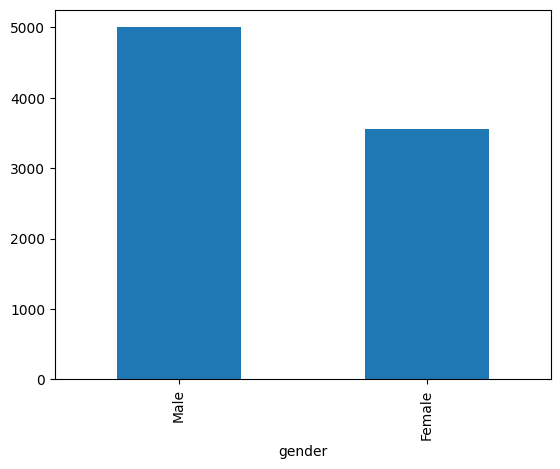

In [17]:
#visualization
df['gender'].value_counts().plot(kind="bar")
plt.show()